In [1]:
import pandas as pd # For dataframes
import matplotlib.pylab as plt #For plotting
from sklearn.cluster import KMeans #For clustering
from scipy.spatial.distance import cdist #For distance
import numpy as np #For numerical calculation

In [2]:
#Generating some sample records

X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.head()

,X,Y


In [3]:
df_xy.X = X 
df_xy.Y = Y 
df_xy.head() #Printing first few records of our DF

,X,Y
0,0.834942,0.196529
1,0.592274,0.299539
2,0.141452,0.752902
3,0.036987,0.420751
4,0.608018,0.129161


<AxesSubplot:xlabel='X', ylabel='Y'>

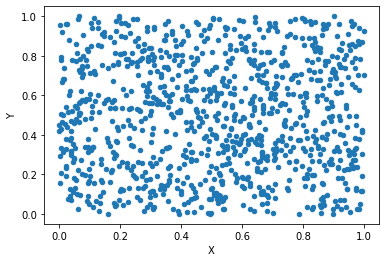

In [4]:
# Plottting a scatter plot to visualize the dataset
df_xy.plot(x="X",y = "Y",kind="scatter")

In [5]:
#Writing first basic model for k = 3
model1 = KMeans(n_clusters=4).fit(df_xy)
model1.labels_

array([3, 3, 2, 0, 3, 2, 1, 2, 1, 3, 0, 3, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2,
       3, 0, 2, 1, 0, 1, 3, 3, 2, 2, 3, 0, 0, 3, 3, 0, 1, 3, 3, 2, 3, 2,
       0, 0, 3, 1, 2, 1, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 0, 1, 2, 2, 3, 1,
       2, 2, 2, 2, 2, 3, 2, 0, 1, 3, 1, 1, 2, 3, 0, 2, 2, 2, 1, 3, 3, 2,
       1, 3, 3, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 1, 1, 2, 2, 0, 3, 1, 2, 0,
       3, 0, 0, 3, 2, 2, 0, 3, 2, 2, 1, 3, 0, 1, 1, 3, 3, 1, 2, 1, 2, 2,
       0, 3, 3, 1, 0, 1, 3, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 1, 2, 1, 0, 1,
       3, 0, 1, 2, 0, 1, 3, 3, 2, 2, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 1, 1, 1, 0, 2, 1, 3, 0, 1, 0, 1, 3, 2, 3, 3, 3, 0, 0, 2, 1,
       2, 0, 3, 2, 1, 0, 3, 2, 3, 2, 0, 3, 0, 3, 1, 2, 2, 1, 0, 2, 2, 3,
       0, 2, 3, 1, 1, 3, 1, 2, 0, 3, 1, 2, 1, 0, 2, 3, 1, 1, 3, 0, 1, 3,
       1, 3, 2, 2, 2, 2, 3, 0, 0, 0, 3, 1, 3, 3, 0, 2, 3, 1, 2, 0, 1, 2,
       1, 3, 2, 0, 2, 2, 3, 1, 1, 2, 3, 0, 2, 3, 2, 3, 3, 0, 1, 1, 1, 0,
       3, 3, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 3, 1, 0,

In [6]:
#Analyzing Cluster centers
model1.cluster_centers_

array([[0.2532564 , 0.21633962],
       [0.74792246, 0.75178999],
       [0.25042729, 0.71603931],
       [0.74449042, 0.27436768]])

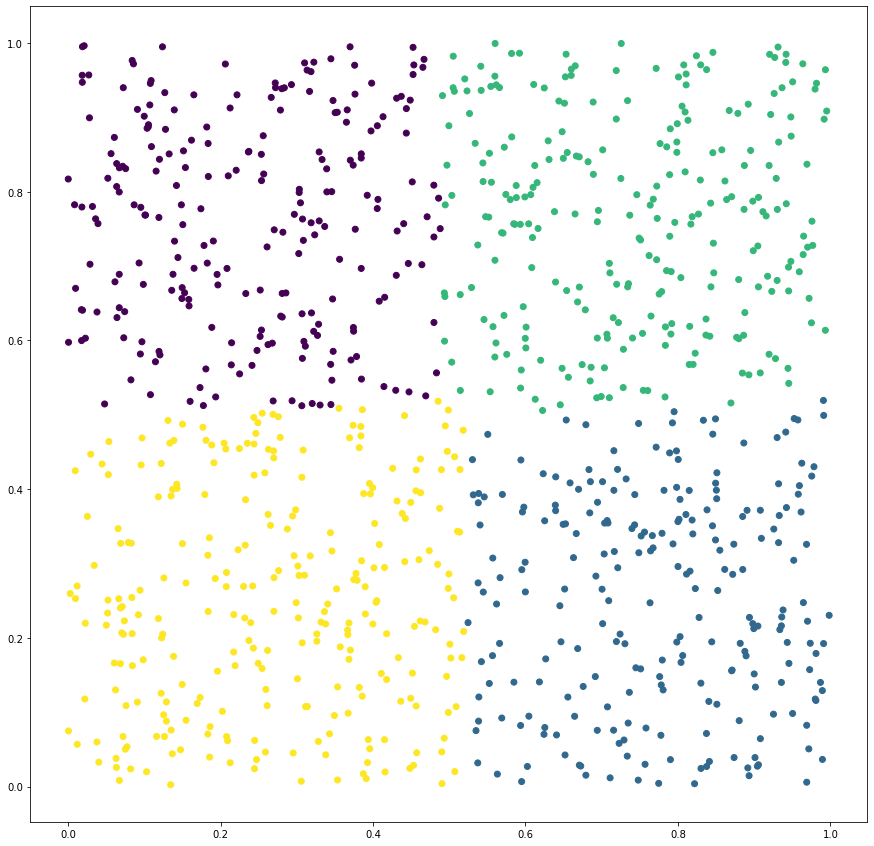

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(X, Y, c=model1.labels_.astype(float))

In [ ]:
#Plotting the dataset post clustering
#df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",cmap=plt.cm.coolwarm)

In [8]:
#Map the above plot with our cluster centers to do the analysis
model1.cluster_centers_

array([[0.23725297, 0.75958508],
       [0.77464872, 0.25152904],
       [0.73931432, 0.76186858],
       [0.27081777, 0.25070784]])

In [9]:
#Reading out university dataset
Univ = pd.read_csv("Datasets/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [10]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [11]:
#Normalizing the values using min max
df_norm = norm_func(Univ.iloc[:,1:])

In [12]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [13]:
model1 = KMeans(n_clusters=3).fit(df_norm)
model1.labels_

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 2, 1])

In [14]:
model1.cluster_centers_

array([[0.60487805, 0.69027778, 0.38815789, 0.36315789, 0.24246323,
        0.66333333],
       [0.84922395, 0.84848485, 0.13277512, 0.22009569, 0.54518283,
        0.83333333],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333]])

In [15]:
###### scree plot or elbow curve ############

k = list(range(2,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in list(range(i)):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

In [ ]:
#df_xy.shape[1]

In [ ]:
#model1.cluster_centers_[0].reshape(1,df_xy.shape[1])

In [ ]:
#sum(cdist(df_xy.iloc[model1.labels_==0,:],model1.cluster_centers_[0].reshape(1,df_xy.shape[1]),"euclidean"))
#model1.cluster_centers_[0].reshape(1,df_norm.shape[1])

In [16]:
TWSS_clusters = pd.DataFrame(columns = ["TWSS", "No. Of Clusters"])

In [17]:
TWSS_clusters.head()

,TWSS,No. Of Clusters


In [18]:
TWSS_clusters.TWSS = pd.Series(TWSS)
TWSS_clusters["No. Of Clusters"]=pd.Series(k)

In [19]:
#Checking how as the number clusters are incresing the TWSS is decreasing
TWSS_clusters.head(10)

,TWSS,No. Of Clusters
0,[9.182081214681874],2
1,[7.859236147506019],3
2,[7.081476130334779],4
3,[6.001381819283241],5
4,[5.4780561689352325],6
5,[4.999315321732963],7
6,[4.442524882431327],8
7,[4.052600839599222],9


([<matplotlib.axis.XTick at 0x117d59f9520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

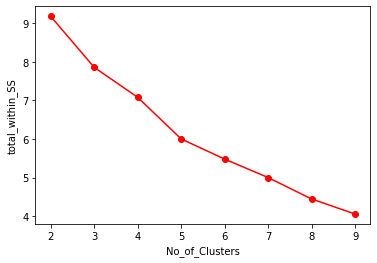

In [20]:
#Plotting number of clusters against TWSS to find the optimal number for K
plt.plot(k,TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS");plt.xticks(k)

In [21]:
#Writing a model for less number of k
model1=KMeans(n_clusters=2).fit(df_norm)

In [22]:
model1.labels_ # getting the labels of clusters assigned to each row 

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

In [23]:
#Writing a model for optimal number of k shown by our elbow plot
model2=KMeans(n_clusters=3).fit(df_norm)

In [24]:
model2.labels_

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 2, 1])

In [25]:
#Writing a model for higher number of k
model3=KMeans(n_clusters=5).fit(df_norm)

In [26]:
model3.labels_

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 4, 0, 3, 3, 1, 0, 1, 0, 1, 2, 3, 2, 3,
       3, 1, 0])

In [27]:
#Creating series for all the models with their respective lables
md1=pd.Series(model1.labels_)
md2=pd.Series(model2.labels_)
md3=pd.Series(model3.labels_)

In [28]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [29]:
#Adding those series in our original dataset
Univ['clust1']=md1
Univ['clust2']=md2
Univ['clust3']=md3

In [30]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust1,clust2,clust3
0,Brown,1310,89,22,13,22704,94,1,1,3
1,CalTech,1415,100,25,6,63575,81,1,1,4
2,CMU,1260,62,59,9,25026,72,0,0,2
3,Columbia,1310,76,24,12,31510,88,1,0,3
4,Cornell,1280,83,33,13,21864,90,1,0,3


In [31]:
#Reshuffling the columns, last columns are taken first for better reading
Univ = Univ.iloc[:,[9,8,7,0,1,2,3,4,5,6]]

In [32]:
Univ.head()

,clust3,clust2,clust1,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,3,1,1,Brown,1310,89,22,13,22704,94
1,4,1,1,CalTech,1415,100,25,6,63575,81
2,2,0,0,CMU,1260,62,59,9,25026,72
3,3,0,1,Columbia,1310,76,24,12,31510,88
4,3,0,1,Cornell,1280,83,33,13,21864,90


In [37]:
a = Univ.iloc[:,4:10].groupby(Univ.clust1).mean()
b = Univ.iloc[:,4:10].groupby(Univ.clust2).mean()
c = Univ.iloc[:,4:10].groupby(Univ.clust3).mean()

In [38]:
#First model result
a

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust1,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1314.473684,85.789474,30.157895,11.368421,31810.105263,90.736842


In [39]:
#Second model result
b

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust2,,,,,,
0,1258.181818,77.545455,41.727273,12.818182,22872.0,87.00
1,1357.500000,90.400000,24.100000,10.000000,39329.6,92.40
2,1061.500000,38.750000,70.000000,19.250000,9953.0,71.75


In [40]:
#Third model result
c

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust3,,,,,,
0,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
3,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


### Now you can write the results in result variables and share the file with client

### Also you can rebuild the models by splitting the dataset